# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

### Data import

In [43]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings("ignore")
from pandas.plotting import scatter_matrix


%matplotlib inline

In [44]:
# Load the dataset
df = pd.read_csv("wholesale_data.csv")

### Data Cleaning

In [45]:
# Check for missing or incorrect data
print(df.isnull().sum())  # Check for missing values

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [46]:
df.shape

(440, 8)

In [47]:
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [48]:
print("Channel unique values:",df['Channel'].unique())
print("Region unique values",df['Region'].unique())

Channel unique values: [2 1]
Region unique values [3 1 2]


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [59]:
# Display data description
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [60]:
# Select three indices of to sample from the dataset
indices = [26,176,392]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(df.loc[indices], columns = df.keys()).reset_index(drop = True)

print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,9898,961,2861,3151,242,833
1,1,3,45640,6958,6536,7368,1532,230
2,1,3,518,4180,3600,659,122,654


### EDA

In [61]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

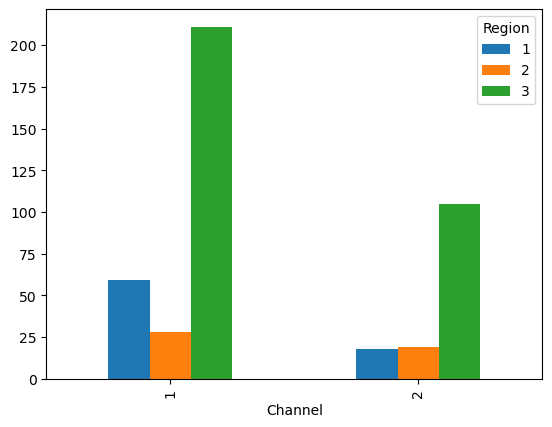

Region    1   2    3
Channel             
1        59  28  211
2        18  19  105


In [53]:
# Channel count
def categorical_multi(i,j):
    pd.crosstab(df[i],df[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(df[i],df[j]))

categorical_multi(i='Channel',j='Region')   

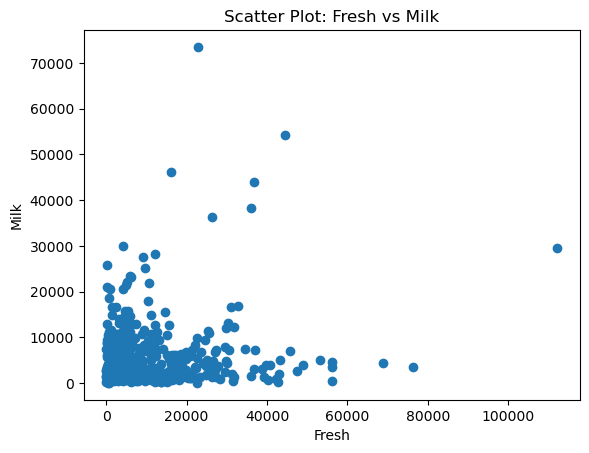

In [54]:
# Scatter plot between "Fresh" and "Milk" variables
plt.scatter(df['Fresh'], df['Milk'])
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Scatter Plot: Fresh vs Milk')
plt.show()

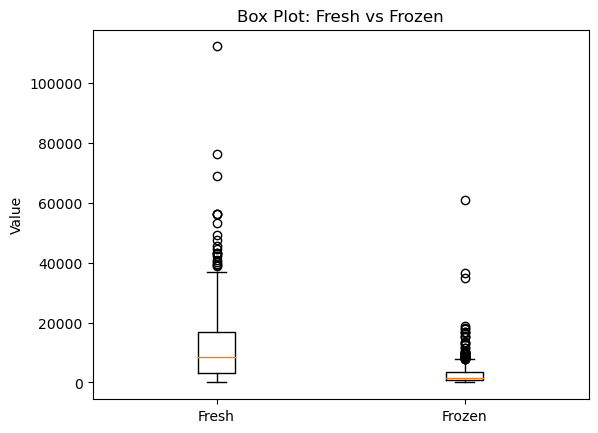

In [62]:
#Box Plot: Compare the distributions of "Fresh" and "Frozen."
plt.boxplot([df['Fresh'], df['Frozen']])
plt.xticks([1, 2], ['Fresh', 'Frozen'])
plt.ylabel('Value')
plt.title('Box Plot: Fresh vs Frozen')
plt.show()

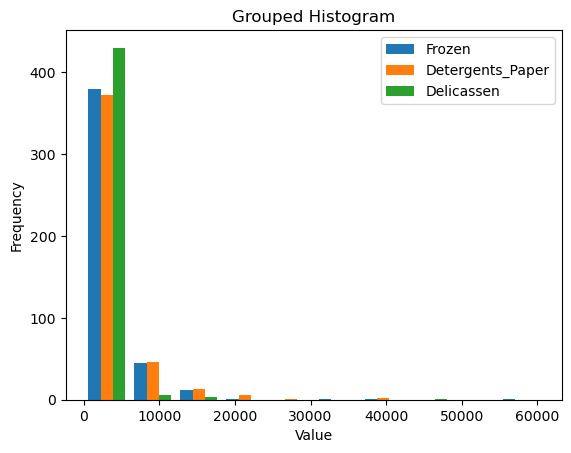

In [56]:
#Histogram between Frozen, Detergents_Paper and Delicassen
# Select the variables for the histogram
variables = ['Frozen', 'Detergents_Paper', 'Delicassen']

# Plot a grouped histogram for the selected variables
plt.hist(df[variables], bins=10, label=variables)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Grouped Histogram')
plt.legend()
plt.show()

### Correlation

In [64]:
# Calculate the correlation matrix
correlation_matrix = df[['Grocery', 'Detergents_Paper']].corr()

# Print the correlation matrix
print(correlation_matrix)

                   Grocery  Detergents_Paper
Grocery           1.000000          0.924641
Detergents_Paper  0.924641          1.000000


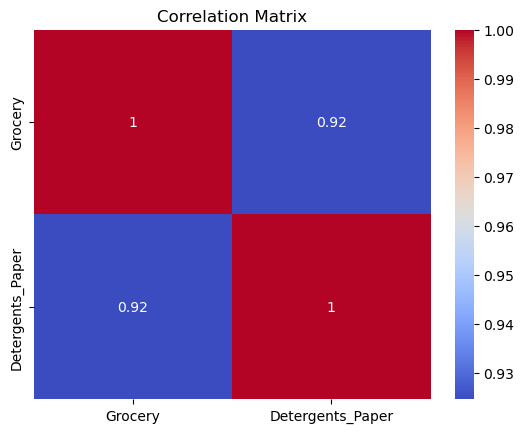

In [65]:
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

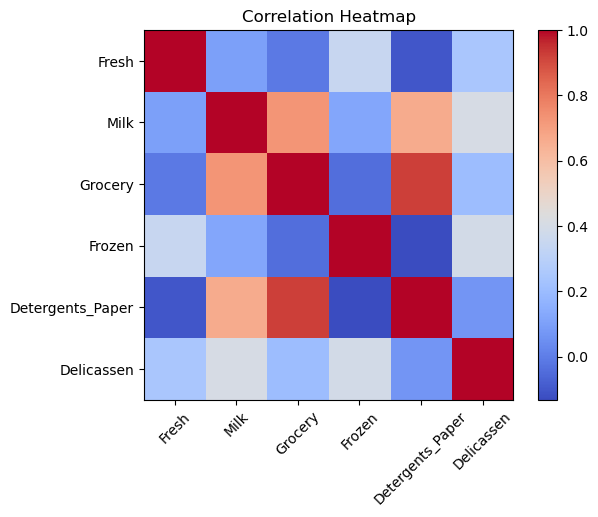

In [66]:
# Heatmap: Explore the correlation between multiple variables using a heatmap.
corr_matrix = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

### Data Transformation

In [67]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the variables
scaled_data = scaler.fit_transform(df)
scaled_frame = pd.DataFrame(scaled_data, columns=df.columns)

scaled_frame.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


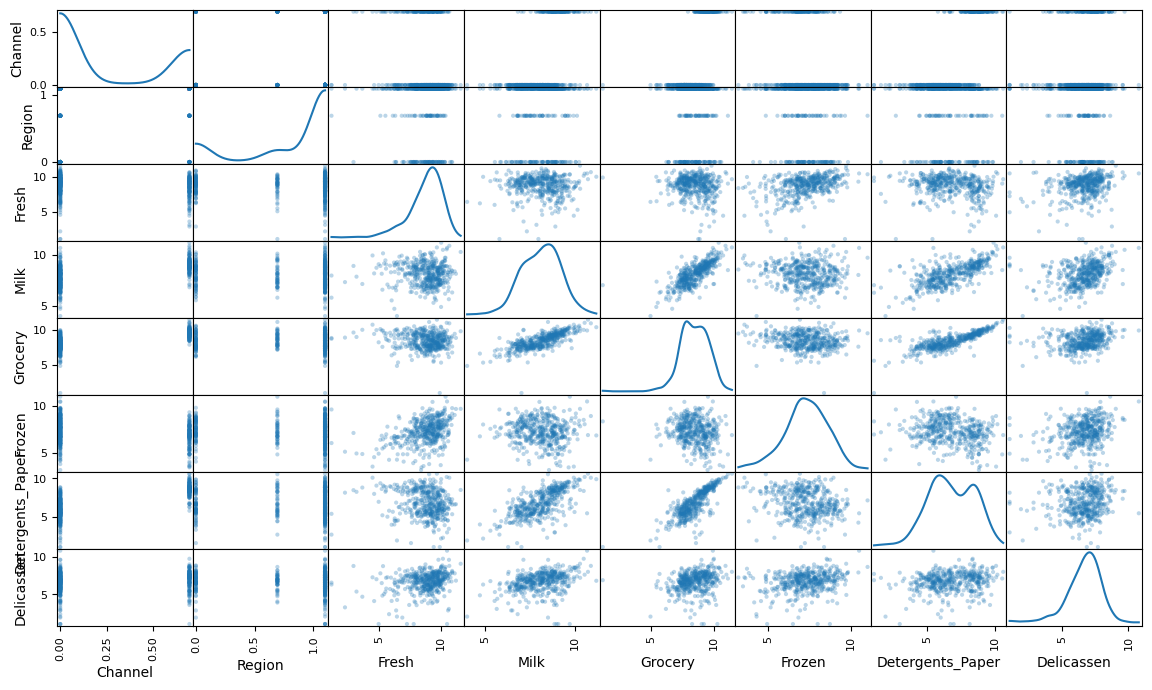

In [68]:
# Scale the data using the natural logarithm
log_data = df.apply(lambda x: np.log(x))

# Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x))

# Produce a scatter matrix for each pair of newly-transformed features
scatter_matrix(log_data, alpha=0.3, figsize=(14, 8), diagonal='kde')
plt.show()

In [69]:
# Display the log-transformed sample data
display(log_samples)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.0,1.098612,9.200088,6.867974,7.958926,8.055475,5.488938,6.725034
1,0.0,1.098612,10.728540,8.847647,8.785081,8.904902,7.334329,5.438079
2,0.0,1.098612,6.249975,8.338067,8.188689,6.490724,4.804021,6.483107


### Outlier

<Axes: >

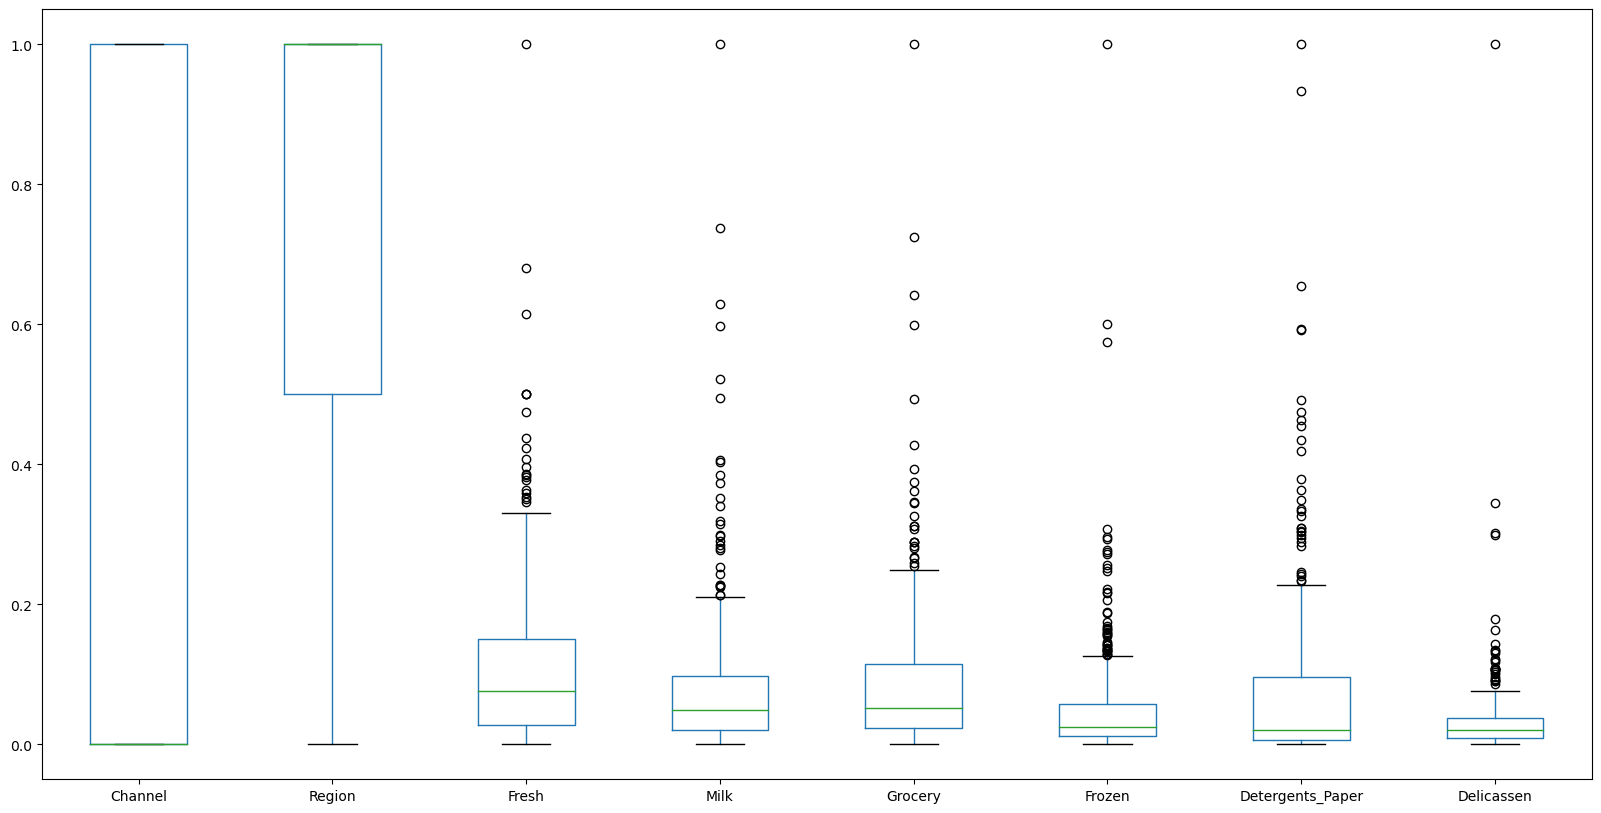

In [70]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled, columns = [name for name in list(df)])
fig = plt.figure(figsize = (20,10))
scaled_data.boxplot(column=[name for name in list(scaled_data)], grid=False)

In [71]:
# Select the indices for data points to remove
outliers  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) * 1.5
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    out = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(out)
    outliers = outliers + list(out.index.values)
    

#Creating list of more outliers which are the same for multiple features.
outliers = list(set([x for x in outliers if outliers.count(x) > 1]))    

print ("Outliers: {}".format(outliers))

# Remove the outliers, if any were specified 
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print ("The good dataset now has {} observations after removing outliers.".format(len(good_data)))

Data points considered outliers for the feature 'Channel':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen


Data points considered outliers for the feature 'Region':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
196,0.000000,0.0,10.329539,8.883086,8.496378,9.836867,6.637258,7.964156
197,0.693147,0.0,7.794411,8.867427,9.248695,7.027315,8.369621,7.291656
198,0.000000,0.0,9.366147,7.675082,8.828201,8.168203,6.383507,6.546785
199,0.000000,0.0,9.176784,7.731931,7.655391,6.253829,5.996452,5.849325
200,0.693147,0.0,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
...,...,...,...,...,...,...,...,...
268,0.693147,0.0,9.384966,8.993800,9.895808,6.974479,8.759982,6.548219
269,0.000000,0.0,9.630234,5.552960,7.037028,7.830426,5.808142,5.318120
270,0.000000,0.0,8.459564,6.939254,6.882437,8.612503,5.283204,4.025352
271,0.000000,0.0,7.641564,8.518592,7.354362,7.021084,4.990433,7.346010


Data points considered outliers for the feature 'Fresh':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,0.693147,1.098612,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,0.000000,1.098612,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,0.693147,1.098612,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,0.000000,1.098612,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,0.693147,1.098612,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,0.000000,1.098612,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,0.693147,1.098612,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,0.693147,1.098612,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,0.693147,0.000000,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,0.693147,0.693147,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,0.693147,1.098612,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,0.000000,1.098612,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,0.000000,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,0.000000,1.098612,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,0.0,1.098612,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,0.0,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,0.693147,1.098612,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,0.693147,1.098612,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,0.693147,1.098612,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,0.693147,1.098612,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,0.693147,1.098612,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,0.693147,0.000000,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,0.000000,0.693147,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,0.000000,1.098612,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,0.000000,1.098612,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,0.000000,1.098612,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,0.0,1.098612,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,0.0,1.098612,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicassen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,0.000000,1.098612,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,0.693147,1.098612,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,0.000000,1.098612,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,0.000000,1.098612,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,0.000000,1.098612,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,0.000000,1.098612,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,0.000000,1.098612,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,0.000000,1.098612,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,0.000000,1.098612,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,0.000000,0.000000,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outliers: [128, 65, 66, 154, 264, 233, 203, 75, 218]
The good dataset now has 431 observations after removing outliers.


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [72]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

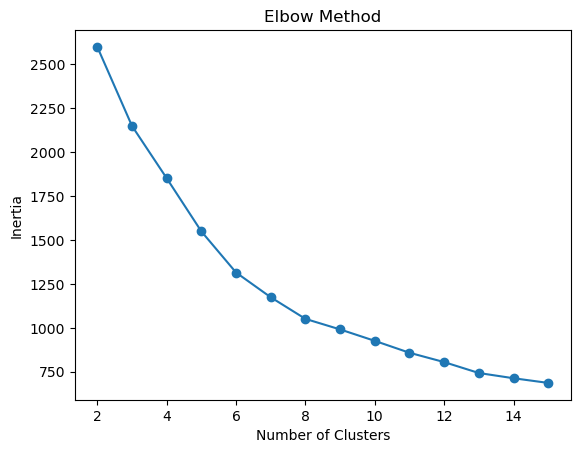

In [73]:
# Determining the optimal number of clusters
# Iterate over the range of clusters from 2 to 15 and calculate the inertia for each cluster
inertia_values = []
for n_clusters in range(2, 16):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_frame)
    inertia_values.append(kmeans.inertia_)

# Plotting the inertia values to determine the optimal number of clusters
plt.plot(range(2, 16), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [75]:
kmeans = KMeans(n_clusters = 6,random_state = 111)
y_means = kmeans.fit(scaled_frame)

y_means

KMeans(n_clusters=6, random_state=111)

In [76]:
print('SSE: ', kmeans.inertia_)
print('\nCentroids: \n', kmeans.cluster_centers_)

SSE:  1313.9619874240173

Centroids: 
 [[-6.90297086e-01  5.90668285e-01 -2.26969330e-01 -3.81612608e-01
  -4.75234627e-01 -1.72435121e-01 -4.42861386e-01 -1.86419955e-01]
 [ 1.44865163e+00  1.66562579e-01 -3.35427763e-01  4.58126517e-01
   6.73224816e-01 -3.49684911e-01  6.89164252e-01  4.76614618e-02]
 [-5.90811099e-01 -1.58939862e+00 -1.17369902e-01 -3.50992288e-01
  -4.02741180e-01  1.33513200e-02 -4.22747572e-01 -1.62015752e-01]
 [ 1.44865163e+00 -5.58343155e-02  3.13830315e-01  3.92190593e+00
   4.27561037e+00 -3.57419457e-03  4.61816580e+00  5.03365339e-01]
 [-6.90297086e-01  5.90668285e-01  1.96681731e+00  5.17550306e+00
   1.28721685e+00  6.90059988e+00 -5.54861977e-01  1.64784475e+01]
 [-5.50800431e-01  3.09580198e-01  1.86860622e+00 -1.26905907e-01
  -2.56963592e-01  1.42079094e+00 -4.18345174e-01  4.02778334e-01]]


In [77]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

0    172
1    125
2     86
5     46
3     10
4      1
dtype: int64

In [78]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=400, n_init=100, random_state=0)
y_means = kmeans.fit(scaled_frame)

In [79]:
pca2 = PCA(n_components=2).fit(scaled_frame)
pca2d = pca2.transform(scaled_frame)

print("Explained variance is:",pca2.explained_variance_)
print("Explained variance ratio",pca2.explained_variance_ratio_)
print("Variance for 1st component is 38.75% & 2nd component is 22.37%")

Explained variance is: [3.10707136 1.79404441]
Explained variance ratio [0.38750123 0.22374588]
Variance for 1st component is 38.75% & 2nd component is 22.37%


Explained variance is: [3.10707136 1.79404441 1.0140786  0.74007428]
Explained variance ratio is: [0.38750123 0.22374588 0.12647173 0.09229904]


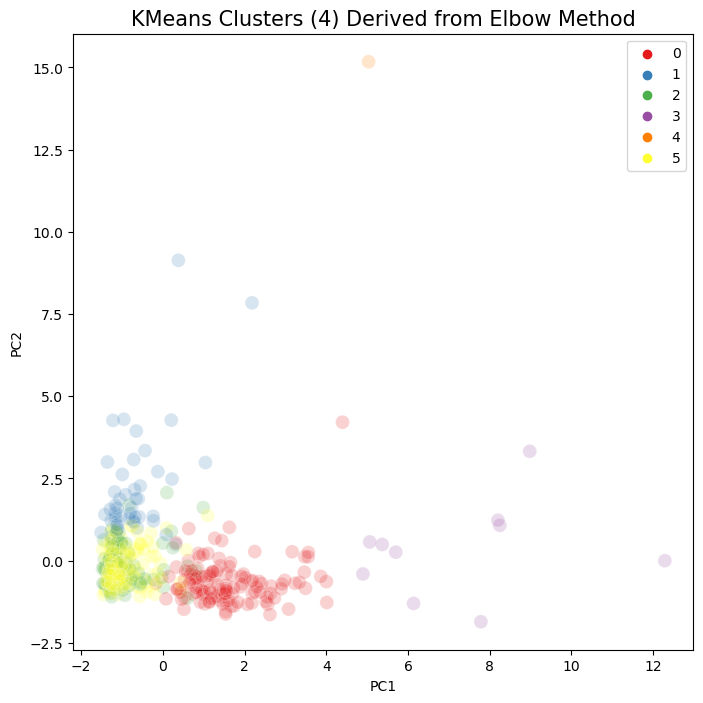

In [80]:
pca4 = PCA(n_components=4).fit(scaled_frame)
pca4d = pca4.transform(scaled_frame)

print("Explained variance is:",pca4.explained_variance_)
print("Explained variance ratio is:",pca4.explained_variance_ratio_)

plt.figure(figsize=(8, 8))
sns.scatterplot(x=pca4d[:, 0], y=pca4d[:, 1],
                hue=y_means.labels_,
                palette='Set1',
                s=100, alpha=0.2).set_title('KMeans Clusters (4) Derived from Elbow Method', fontsize=15)
plt.legend()
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [81]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

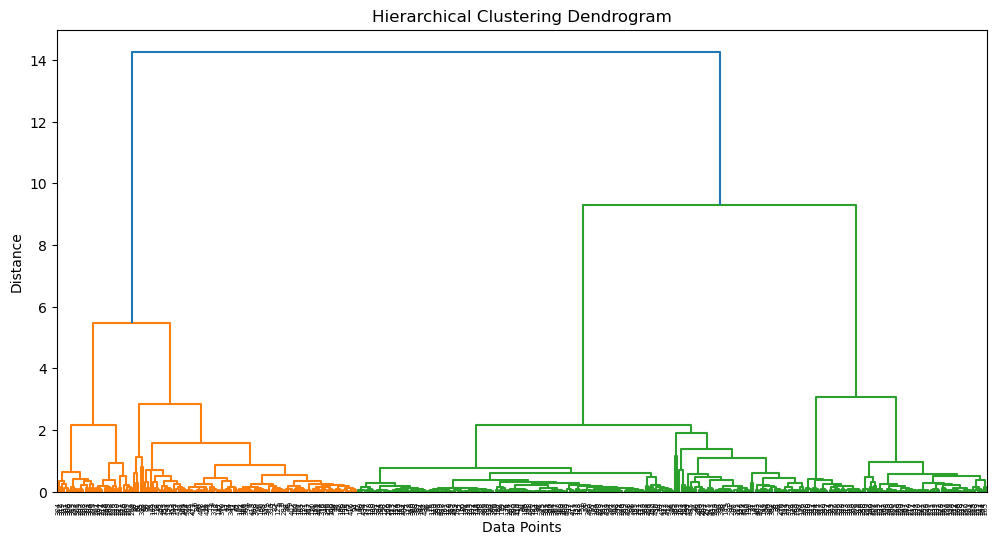

In [82]:
# Performing hierarchical clustering
# Using Ward's linkage method
linkage_matrix = linkage(scaled_data, method='ward')

# Visualizing the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [83]:
from sklearn.decomposition import PCA

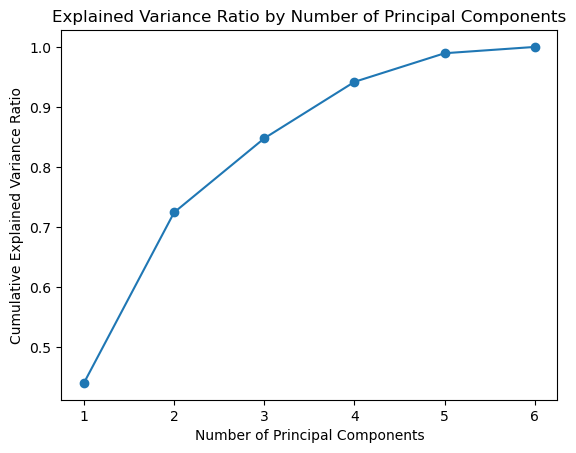

In [94]:
# Assuming the features are stored in a variable called 'X'
X = scaled_frame.drop(columns=['Channel','Region'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio)+1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Principal Components')
plt.show()

In [95]:
#set n-component = 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_frame)

principal_df = pd.DataFrame(data=principal_components, 
             columns=['principal component 1', 'principal component 2']) 

final_df = principal_df

final_df

,principal component 1,principal component 2
0,0.843939,-0.515351
1,1.062676,-0.484601
2,1.269141,0.682055
3,-1.056782,0.610821
4,0.634030,0.974199
...,...,...
435,0.222884,2.480505
436,-1.290172,1.560397
437,3.865149,-0.479854
438,-1.097067,-0.069896


In [96]:
import matplotlib.pyplot as plt
plt.scatter(x = final_df['principal component 1'], y = final_df['principal component 2'], c= y_pred)
plt.show()

NameError: name 'y_pred' is not defined

# Part V - Conclusion

From the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Based on the exploratory data analysis (EDA) conducted on the wholesale customer dataset, the following findings can be summarized:

- The distribution of the variables in the dataset is highly skewed, with a majority of the variables having a long tail on the right side. This indicates that there are a few customers who spend significantly more than the majority of customers in each product category.

- There are strong positive correlations observed between the "Grocery" and "Detergents_Paper" variables, as well as between the "Milk" and "Grocery" variables. This suggests that customers who spend more on groceries also tend to spend more on detergents and customers who spend more on milk also tend to spend more on groceries.

- The "Fresh" variable shows a relatively low correlation with the other variables, indicating that the spending on fresh products is not strongly associated with the spending on other product categories. This suggests that customers may have different preferences or needs when it comes to fresh products compared to other categories.

- The majority of the customers in the dataset fall into the lower spending range, with a few customers spending significantly higher amounts in each product category. This indicates that there may be different segments of customers with varying purchasing behaviors, such as regular consumers with moderate spending and occasional high-spending customers.